<a href="https://colab.research.google.com/github/allnes/pcam_train/blob/master/lab-4-encoder/pcam_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')
%pip install keras-metrics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
cd  '/content/drive/My Drive/DL_PCAM'

/content/drive/My Drive/DL_PCAM


In [14]:
%ls

camelyonpatch_level_2_split_test_meta.csv
camelyonpatch_level_2_split_test_x.h5
camelyonpatch_level_2_split_test_x.h5.gz
camelyonpatch_level_2_split_test_y.h5
camelyonpatch_level_2_split_test_y.h5.gz
camelyonpatch_level_2_split_train_meta.csv
camelyonpatch_level_2_split_train_x.h5
camelyonpatch_level_2_split_train_x.h5.gz
camelyonpatch_level_2_split_train_y.h5
camelyonpatch_level_2_split_train_y.h5.gz
camelyonpatch_level_2_split_valid_meta.csv
camelyonpatch_level_2_split_valid_x.h5
camelyonpatch_level_2_split_valid_x.h5.gz
camelyonpatch_level_2_split_valid_y.h5
camelyonpatch_level_2_split_valid_y.h5.gz
lab2_dropout.png
lab2.png
lab2_wth_dropout.png
model_plot.png
model_plot_pretrain_mobilenet.png
model_plot_pretrain.png
model_plot_train_resnet50.png
model.png
__pycache__/
train_x_name


In [0]:
import gzip
import shutil
def uzip_file(file_name, origin_name):
  with gzip.open(file_name, 'rb') as f_in:
      with open(origin_name, 'wb') as f_out:
          shutil.copyfileobj(f_in, f_out)


In [0]:
train_x_name = 'camelyonpatch_level_2_split_train_x.h5'
train_y_name = 'camelyonpatch_level_2_split_train_y.h5'

test_x_name = 'camelyonpatch_level_2_split_test_x.h5'
test_y_name = 'camelyonpatch_level_2_split_test_y.h5'

valid_x_name = 'camelyonpatch_level_2_split_valid_x.h5'
valid_y_name = 'camelyonpatch_level_2_split_valid_y.h5'

# uzip_file(train_x_name + '.gz', train_x_name)
# uzip_file(train_y_name + '.gz', train_y_name)

# uzip_file(test_x_name + '.gz', test_x_name)
# uzip_file(test_y_name + '.gz', test_y_name)

# uzip_file(valid_x_name + '.gz', valid_x_name)
# uzip_file(valid_y_name + '.gz', valid_y_name)


In [0]:
from keras.utils import HDF5Matrix, normalize
import pandas as pd
import numpy as np

x_train = HDF5Matrix(train_x_name, 'x', normalizer=lambda x: np.true_divide(x, 255.))
y_train = HDF5Matrix(train_y_name, 'y')

x_valid = HDF5Matrix(valid_x_name, 'x', normalizer=lambda x: np.true_divide(x, 255.))
y_valid = HDF5Matrix(valid_y_name, 'y')

x_test = HDF5Matrix(test_x_name, 'x', normalizer=lambda x: np.true_divide(x, 255.))
y_test = HDF5Matrix(test_y_name, 'y')

262144
<class 'keras.utils.io_utils.HDF5Matrix'>
<class 'numpy.ndarray'>
(96, 96, 3)


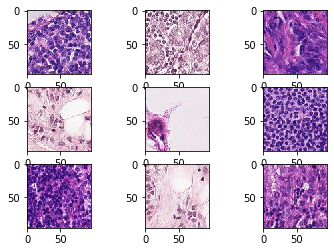

In [18]:
print(len(x_train))
print(type(x_train))
print(type(x_train[0]))
print(x_train[0].shape)
from matplotlib import pyplot
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()


In [0]:
current_core = 96
full_size = current_core * current_core * 3
original_shape = (96, 96, 3)
new_shape = (current_core, current_core, 3)
new_size = (current_core, current_core)

In [0]:
import cv2 as cv
# def resize_for_train(x_array, x_shape):
#   return np.array([cv.resize(elem, dsize=x_shape) for elem in x_array])
# x_train = resize_for_train(x_train, new_size)
# x_valid = resize_for_train(x_valid, new_size)
# x_test  = resize_for_train(x_test,  new_size)


In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Reshape, Lambda, Input, Dropout, Flatten
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
import keras_metrics as ksm
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_metrics(code_metrics, name_metrics):
    plt.plot(history.history[code_metrics])
    plt.plot(history.history['val_' + code_metrics])
    plt.title('Model ' + name_metrics)
    plt.ylabel(name_metrics)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

def show_metrics(list_metrics, name_stage, name_model):
    name_metrics = ['accuracy', 'precision', 'recall', 'f1-score']
    for i in range(4):
        print(name_model + ' ' + name_stage + ' ' + 
              name_metrics[i] + ' : ' + str(list_metrics[i + 1] * 100))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 1, 1, 27648)       0         
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1, 1728)        47777472  
_________________________________________________________________
activation_6 (Activation)    (None, 1, 1, 1728)        0         
_________________________________________________________________
dense_7 (Dense)              (None, 1, 1, 864)         1493856   
_________________________________________________________________
activation_7 (Activation)    (None, 1, 1, 864)         0         
_________________________________________________________________
dense_8 (Dense)              (None, 1, 1, 864)         7473

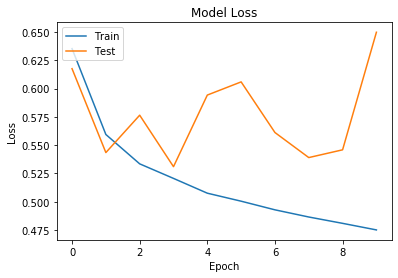

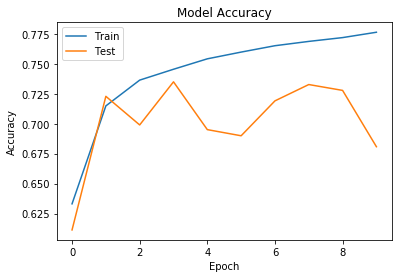

262144/262144 [==============================] - 60s 228us/step
FCN encoder train accuracy : 77.29721069335938
FCN encoder train precision : 81.62644744976431
FCN encoder train recall : 70.45288085932124
FCN encoder train f1-score : 75.62918725303692
32768/32768 [==============================] - 25s 761us/step
FCN encoder valid accuracy : 71.356201171875
FCN encoder valid precision : 79.51145296188393
FCN encoder valid recall : 57.46838536222452
FCN encoder valid f1-score : 66.7163071857442
32768/32768 [==============================] - 8s 231us/step
FCN encoder test accuracy : 68.07861328125
FCN encoder test precision : 76.89300972568954
FCN encoder test recall : 51.65170666146637
FCN encoder test f1-score : 61.79413647365999


In [22]:
name_model = 'FCN encoder'
# ---------------------------------------------------------#
input_img = Input(shape=new_shape)
encoder = Reshape((1, 1, full_size,), input_shape=new_shape)(input_img)
# ---------------------------------------------------------#
encoder = Dense(int(full_size / 16), kernel_initializer='random_uniform', bias_initializer='random_uniform')(encoder)
encoder = Activation('relu')(encoder)
# ---------------------------------------------------------#
encoder = Dense(int(full_size / 32), kernel_initializer='random_uniform', bias_initializer='random_uniform')(encoder)
encoder = Activation('relu')(encoder)
# ---------------------------------------------------------#
encoder = Dense(int(full_size / 32), kernel_initializer='random_uniform', bias_initializer='random_uniform')(encoder)
encoder = Activation('relu')(encoder)
# ---------------------------------------------------------#
encoder = Dense(int(full_size / 64), kernel_initializer='random_uniform', bias_initializer='random_uniform')(encoder)
encoder = Activation('relu')(encoder)
# ---------------------------------------------------------#
encoder = Dense(1, kernel_initializer='random_uniform', bias_initializer='random_uniform')(encoder)
encoder = Activation('sigmoid')(encoder)
# ---------------------------------------------------------#

init_model = Model(input_img, encoder)

init_model.summary()
init_model.compile(loss='binary_crossentropy', optimizer='sgd', 
              metrics = ['binary_accuracy', 
                         ksm.binary_precision(), 
                         ksm.binary_recall(),
                         ksm.binary_f1_score()])

BATCH_SIZE = 256
EPOCHS = 10

history = init_model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_test, y_test),
                    shuffle="batch")

plot_metrics('loss', 'Loss')
plot_metrics('binary_accuracy',  'Accuracy')

show_metrics(init_model.evaluate(x_train, y_train), 'train', name_model)
show_metrics(init_model.evaluate(x_valid, y_valid), 'valid', name_model)
show_metrics(init_model.evaluate(x_test,  y_test),  'test',  name_model)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 1, 1, 27648)       0         
_________________________________________________________________
dense_11 (Dense)             (None, 1, 1, 1728)        47777472  
_________________________________________________________________
activation_11 (Activation)   (None, 1, 1, 1728)        0         
_________________________________________________________________
dense_12 (Dense)             (None, 1, 1, 864)         1493856   
_________________________________________________________________
activation_12 (Activation)   (None, 1, 1, 864)         0         
_________________________________________________________________
dense_13 (Dense)             (None, 1, 1, 864)         7473

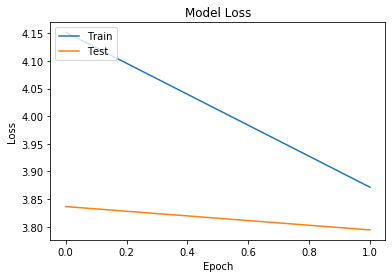

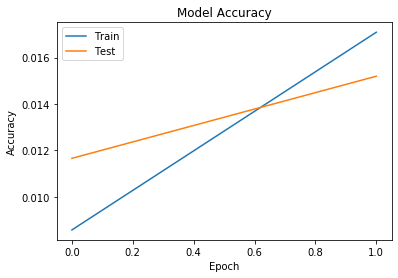

In [24]:
name_model = 'FCN encoder'
# ---------------------------------------------------------#
input_img = Input(shape=new_shape)
encoder = Reshape((1, 1, full_size,), input_shape=new_shape)(input_img)
# ---------------------------------------------------------#
encoder = Dense(int(full_size / 16), kernel_initializer='random_uniform', bias_initializer='random_uniform')(encoder)
encoder = Activation('relu')(encoder)
# ---------------------------------------------------------#
encoder = Dense(int(full_size / 32), kernel_initializer='random_uniform', bias_initializer='random_uniform')(encoder)
encoder = Activation('relu')(encoder)
# ---------------------------------------------------------#
encoder = Dense(int(full_size / 32), kernel_initializer='random_uniform', bias_initializer='random_uniform')(encoder)
encoder = Activation('relu')(encoder)
# ---------------------------------------------------------#
encoder = Dense(int(full_size / 64), kernel_initializer='random_uniform', bias_initializer='random_uniform')(encoder)
encoder = Activation('relu')(encoder)
# ---------------------------------------------------------#

name_model = 'FCN decoder'
# ---------------------------------------------------------#
decoder = Dense(int(full_size / 64), kernel_initializer='random_uniform', bias_initializer='random_uniform')(encoder)
decoder = Activation('relu')(decoder)
# ---------------------------------------------------------#
decoder = Dense(int(full_size / 32), kernel_initializer='random_uniform', bias_initializer='random_uniform')(decoder)
decoder = Activation('relu')(decoder)
# ---------------------------------------------------------#
decoder = Dense(int(full_size / 32), kernel_initializer='random_uniform', bias_initializer='random_uniform')(decoder)
decoder = Activation('relu')(decoder)
# ---------------------------------------------------------#
decoder = Dense(int(full_size / 16), kernel_initializer='random_uniform', bias_initializer='random_uniform')(decoder)
decoder = Activation('relu')(decoder)
# ---------------------------------------------------------#
decoder = Dense(int(full_size), kernel_initializer='random_uniform', bias_initializer='random_uniform')(decoder)
decoder = Activation('relu')(decoder)
# ---------------------------------------------------------#
decoder = Reshape(new_shape, input_shape=(1, 1, int(full_size)))(decoder)
# ---------------------------------------------------------#

final_model = Model(input_img, decoder)

final_model.summary()
final_model.compile(loss='binary_crossentropy', optimizer='sgd', 
              metrics = ['binary_accuracy', 
                         ksm.binary_precision(), 
                         ksm.binary_recall(),
                         ksm.binary_f1_score()])

BATCH_SIZE = 256
EPOCHS = 2

history = final_model.fit(x_train, x_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_test, x_test),
                    shuffle="batch")

plot_metrics('loss', 'Loss')
plot_metrics('binary_accuracy',  'Accuracy')

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 1, 1, 27648)       0         
_________________________________________________________________
dense_11 (Dense)             (None, 1, 1, 1728)        47777472  
_________________________________________________________________
activation_11 (Activation)   (None, 1, 1, 1728)        0         
_________________________________________________________________
dense_12 (Dense)             (None, 1, 1, 864)         1493856   
_________________________________________________________________
activation_12 (Activation)   (None, 1, 1, 864)         0         
_________________________________________________________________
dense_13 (Dense)             (None, 1, 1, 864)         7473

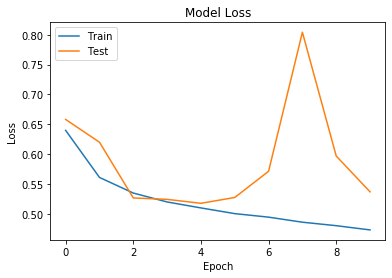

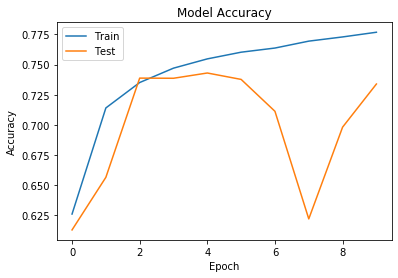

262144/262144 [==============================] - 78s 296us/step
FCN encoder train accuracy : 79.54559326171875
FCN encoder train precision : 79.93383421445141
FCN encoder train recall : 78.8970947265023
FCN encoder train f1-score : 79.41207590814027
32768/32768 [==============================] - 9s 286us/step
FCN encoder valid accuracy : 74.481201171875
FCN encoder valid precision : 78.46427301757224
FCN encoder valid recall : 67.42012340358347
FCN encoder valid f1-score : 72.5241456491958
32768/32768 [==============================] - 9s 286us/step
FCN encoder test accuracy : 73.3856201171875
FCN encoder test precision : 77.3780575019498
FCN encoder test recall : 66.06216034642448
FCN encoder test f1-score : 71.27375240078577


In [25]:
name_model = 'FCN encoder'
encoder = Dense(1, kernel_initializer='random_uniform', bias_initializer='random_uniform')(encoder)
encoder = Activation('sigmoid')(encoder)

setting_model = Model(input_img, encoder)

setting_model.summary()
setting_model.compile(loss='binary_crossentropy', optimizer='sgd', 
              metrics = ['binary_accuracy', 
                         ksm.binary_precision(), 
                         ksm.binary_recall(),
                         ksm.binary_f1_score()])

BATCH_SIZE = 256
EPOCHS = 10

history = setting_model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_test, y_test),
                    shuffle="batch")

plot_metrics('loss', 'Loss')
plot_metrics('binary_accuracy',  'Accuracy')

show_metrics(setting_model.evaluate(x_train, y_train), 'train', name_model)
show_metrics(setting_model.evaluate(x_valid, y_valid), 'valid', name_model)
show_metrics(setting_model.evaluate(x_test,  y_test),  'test',  name_model)